In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [17]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [18]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | barcelos
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | usinsk
Processing Record 7 of Set 1 | inuvik
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | aklavik
Processing Record 10 of Set 1 | hobyo
Processing Record 11 of Set 1 | camaguey
Processing Record 12 of Set 1 | santa fe
Processing Record 13 of Set 1 | alofi
Processing Record 14 of Set 1 | nador
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | sur
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | barrow
Processing Record 23 of Set 1 | severnyy
Processing Record 24 

Processing Record 38 of Set 4 | yar-sale
Processing Record 39 of Set 4 | muros
Processing Record 40 of Set 4 | yunjinghong
City not found. Skipping...
Processing Record 41 of Set 4 | geraldton
Processing Record 42 of Set 4 | mabaruma
Processing Record 43 of Set 4 | tucano
Processing Record 44 of Set 4 | mangaluru
Processing Record 45 of Set 4 | labrea
Processing Record 46 of Set 4 | sidi qasim
City not found. Skipping...
Processing Record 47 of Set 4 | broome
Processing Record 48 of Set 4 | hami
Processing Record 49 of Set 4 | tahta
Processing Record 50 of Set 4 | kavieng
Processing Record 1 of Set 5 | sturgeon bay
Processing Record 2 of Set 5 | ensley
Processing Record 3 of Set 5 | severo-kurilsk
Processing Record 4 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 5 | njombe
Processing Record 6 of Set 5 | marrakesh
Processing Record 7 of Set 5 | chapais
Processing Record 8 of Set 5 | wanning
Processing Record 9 of Set 5 | eyl
Processing Record 10 of Set 5 

Processing Record 25 of Set 8 | lae
Processing Record 26 of Set 8 | constitucion
Processing Record 27 of Set 8 | palm valley
Processing Record 28 of Set 8 | beringovskiy
Processing Record 29 of Set 8 | marsaxlokk
Processing Record 30 of Set 8 | collie
Processing Record 31 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 32 of Set 8 | mokhsogollokh
Processing Record 33 of Set 8 | sao joao da barra
Processing Record 34 of Set 8 | guamal
Processing Record 35 of Set 8 | ierapetra
Processing Record 36 of Set 8 | dergachi
Processing Record 37 of Set 8 | barreirinhas
Processing Record 38 of Set 8 | dubai
Processing Record 39 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 40 of Set 8 | rawson
Processing Record 41 of Set 8 | san cristobal
Processing Record 42 of Set 8 | ulagan
Processing Record 43 of Set 8 | kupang
Processing Record 44 of Set 8 | hofn
Processing Record 45 of Set 8 | dicabisagan
Processing Record 46 of Set 8 | atambua
Processing Record 47 of S

Processing Record 9 of Set 12 | nantucket
Processing Record 10 of Set 12 | kijang
Processing Record 11 of Set 12 | port hedland
Processing Record 12 of Set 12 | salinas
Processing Record 13 of Set 12 | bulgan
Processing Record 14 of Set 12 | tonk
Processing Record 15 of Set 12 | matara
Processing Record 16 of Set 12 | hohhot
Processing Record 17 of Set 12 | amahai
Processing Record 18 of Set 12 | zhanaozen
Processing Record 19 of Set 12 | nishihara
Processing Record 20 of Set 12 | benjamin aceval
Processing Record 21 of Set 12 | catuday
Processing Record 22 of Set 12 | shelburne
Processing Record 23 of Set 12 | christchurch
Processing Record 24 of Set 12 | south holland
Processing Record 25 of Set 12 | poya
Processing Record 26 of Set 12 | westport
Processing Record 27 of Set 12 | zyryanka
Processing Record 28 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 29 of Set 12 | nouadhibou
Processing Record 30 of Set 12 | mirnyy
Processing Record 31 of Set 12 | prince r

In [20]:
len(city_data)

550

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,59.00,44,0,25.32,CL,2021-02-04 22:29:07
1,Barcelos,41.5388,-8.6151,48.99,93,40,4.61,PT,2021-02-04 22:28:00
2,Castro,-24.7911,-50.0119,70.43,93,96,6.67,BR,2021-02-04 22:29:18
3,Bredasdorp,-34.5322,20.0403,68.00,77,98,5.75,ZA,2021-02-04 22:29:18
4,Port Elizabeth,-33.9180,25.5701,68.00,88,0,4.61,ZA,2021-02-04 22:26:09
5,Usinsk,65.9939,57.5281,-7.08,91,98,12.24,RU,2021-02-04 22:29:18
6,Inuvik,68.3499,-133.7218,-32.80,68,12,2.30,CA,2021-02-04 22:29:18
7,Lebu,-37.6167,-73.6500,68.94,60,1,4.27,CL,2021-02-04 22:29:18
8,Aklavik,68.2191,-135.0107,-41.80,66,20,3.44,CA,2021-02-04 22:29:19
9,Hobyo,5.3505,48.5268,76.14,80,15,15.52,SO,2021-02-04 22:29:19


In [22]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [23]:
city_data_df=city_data_df[new_column_order]

In [24]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-02-04 22:29:07,-53.1500,-70.9167,59.00,44,0,25.32
1,Barcelos,PT,2021-02-04 22:28:00,41.5388,-8.6151,48.99,93,40,4.61
2,Castro,BR,2021-02-04 22:29:18,-24.7911,-50.0119,70.43,93,96,6.67
3,Bredasdorp,ZA,2021-02-04 22:29:18,-34.5322,20.0403,68.00,77,98,5.75
4,Port Elizabeth,ZA,2021-02-04 22:26:09,-33.9180,25.5701,68.00,88,0,4.61
5,Usinsk,RU,2021-02-04 22:29:18,65.9939,57.5281,-7.08,91,98,12.24
6,Inuvik,CA,2021-02-04 22:29:18,68.3499,-133.7218,-32.80,68,12,2.30
7,Lebu,CL,2021-02-04 22:29:18,-37.6167,-73.6500,68.94,60,1,4.27
8,Aklavik,CA,2021-02-04 22:29:19,68.2191,-135.0107,-41.80,66,20,3.44
9,Hobyo,SO,2021-02-04 22:29:19,5.3505,48.5268,76.14,80,15,15.52


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities1.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

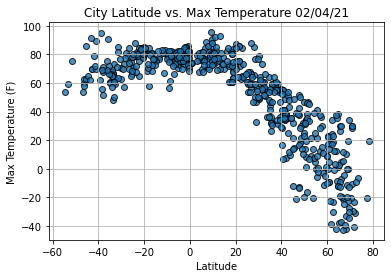

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

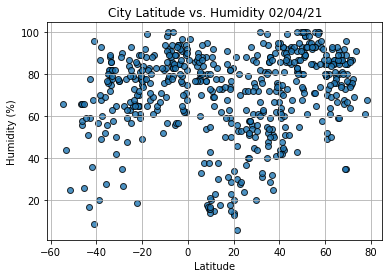

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

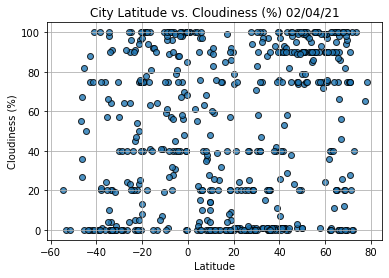

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

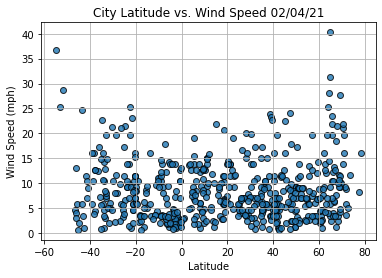

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
index13 = city_data_df.loc[13]

city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Barcelos,PT,2021-02-04 22:28:00,41.5388,-8.6151,48.99,93,40,4.61
5,Usinsk,RU,2021-02-04 22:29:18,65.9939,57.5281,-7.08,91,98,12.24
6,Inuvik,CA,2021-02-04 22:29:18,68.3499,-133.7218,-32.80,68,12,2.30
8,Aklavik,CA,2021-02-04 22:29:19,68.2191,-135.0107,-41.80,66,20,3.44
9,Hobyo,SO,2021-02-04 22:29:19,5.3505,48.5268,76.14,80,15,15.52


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

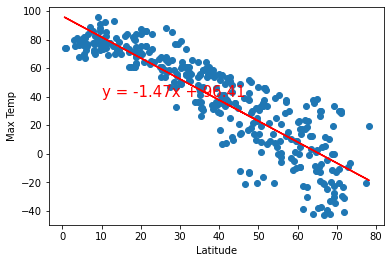

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

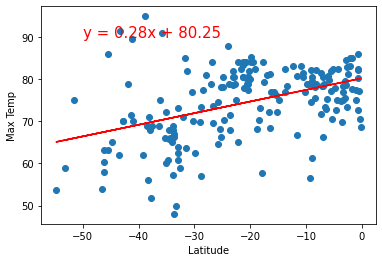

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

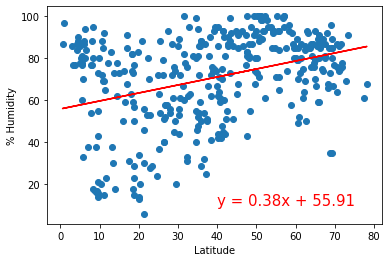

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

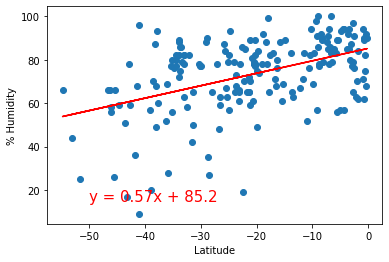

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

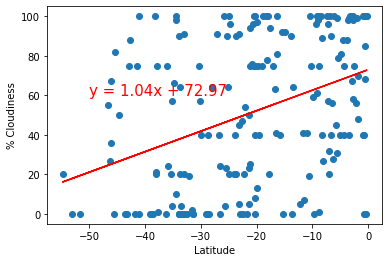

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

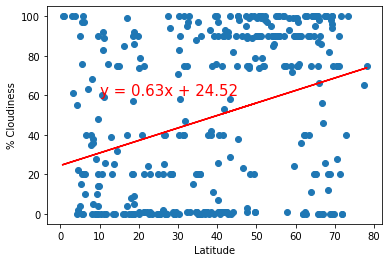

In [45]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

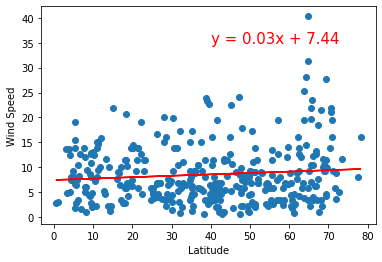

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

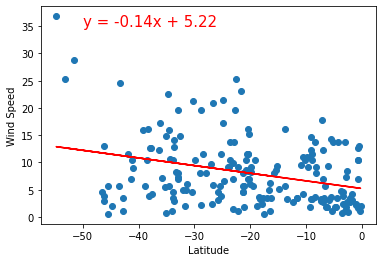

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [49]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key